In [1]:
import dg
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt


'''
Here use self developed covolutional neural
'''

'\nHere use self developed covolutional neural\n'

In [2]:
# here data is a PyTorch tensor
def imshow(data):
    img = data / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg.reshape([28,28]), cmap = 'gray')
    plt.show()

def label2onehot(labels):
    b_size = len(labels)
    ret = np.zeros([b_size, 10, 1])
    for i, label in enumerate(labels):
        ret[i][label] = 1
    return ret


In [3]:
# define batch size and data loaders, including train data and test data loaders
batch_size = 15
num_labels = 10

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root = './data', train = True,
                                      download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                          shuffle = True, num_workers = 2)
testset = torchvision.datasets.MNIST(root='./data', train = False,
                                     download=True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                         shuffle = False, num_workers = 2)


data from PyTorch data loaders:
x_data[0].type: <class 'torch.Tensor'>
torch.Size([1, 28, 28])
y_data[0].type: <class 'torch.Tensor'>
torch.Size([])


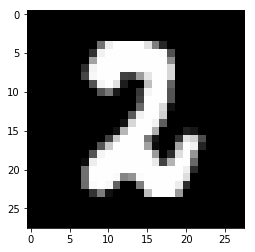

label: tensor(2)


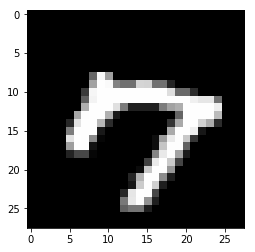

label: tensor(7)


In [4]:
# first take a look at some of the test pictures
train_iter = iter(trainloader)
x_data, y_data = train_iter.next()
print('data from PyTorch data loaders:')
print('x_data[0].type:', type(x_data[0]))
print(x_data[0].shape)
print('y_data[0].type:', type(y_data[0]))
print(y_data[0].shape)
for i in range(2):
    imshow(x_data[i])
    print('label:', y_data[i])

In [6]:
# next to build a CNN

x_entry = x_data.numpy().reshape([batch_size, 28, 28, 1])
y_entry = label2onehot(y_data).reshape([batch_size, num_labels, 1])
print('Input image shape:', x_entry.shape)
print('Y label shape:', y_entry.shape)
print()
img_in = dg.identity(x_entry)
y_label = dg.identity(y_entry)
conv = dg.cnn.conv(img_in, 3, 6)
print('added conv layer with filter size: {}, num_filters: {}, stride: {}, padding: {}, out shape: {}'\
      .format(conv.op.filter_size, conv.op.num_filter, conv.op.stride, conv.op.padding, conv.shape()))
relu = dg.relu(conv)
print('added relu, shape:', relu.shape())
pool = dg.cnn.max_pool(relu, 3, stride = 1)
print('added pool with filter size: {}, stride: {}, padding: {}, out shape: {}'\
      .format(pool.op.filter_size, pool.op.stride, pool.op.padding, pool.shape()))
fl = dg.reshape(pool, (15, 3456, 1))
print('added reshaped layer, the new shape: ', fl.shape())
w = dg.identity(np.random.randn(10, 3456))
b = dg.identity(np.random.randn(10, 1))
print('created parameters w with shape {} and b with shape {}'.format(w.shape(), b.shape()))
print('w shape:', w.shape())
fc = dg.mat_mul(w, fl)
print('added fully connect layer with shape: {}'.format(fc.shape()))
out = dg.mat_add(fc, b)
print('added bias to give logits output with shape: {}'.format(out.shape()))
loss = dg.softmax_cross(out, y_label)
print('added cross entropy with softmax loss with shape: {}'.format(loss.shape()))

Input image shape: (15, 28, 28, 1)
Y label shape: (15, 10, 1)

added conv layer with filter size: (3, 3), num_filters: 6, stride: (1, 1), padding: (0, 0), out shape: (15, 26, 26, 6)
added relu, shape: (15, 26, 26, 6)
added pool with filter size: (3, 3), stride: (1, 1), padding: (0, 0), out shape: (15, 24, 24, 6)
added reshaped layer, the new shape:  (15, 3456, 1)
created parameters w with shape (10, 3456) and b with shape (10, 1)
w shape: (10, 3456)
added fully connect layer with shape: (15, 10, 1)
added bias to give logits output with shape: (15, 10, 1)
added cross entropy with softmax loss with shape: (1,)


In [ ]:
# finally, train the built CNN
lr = 0.0001
sgd_optim = dg.optim.SGD(loss, [w, b] + conv.op.params(), lr)
epoch = 1
train_iter = iter(trainloader)
for i, train_data in enumerate(train_iter):
    x_train = train_data[0].numpy().reshape([batch_size, 28, 28, 1])
    y_train = label2onehot(train_data[1]).reshape([batch_size, num_labels, 1])
    sgd_optim.step({img_in:x_train, y_label:y_train})
    if i % 100 == 0:
        print('Loss after training {} times: {}'.format(i+1, loss.data()))
    

Loss after training 1 times: [1.90826556e-08]
Loss after training 101 times: [2.45125319]
Loss after training 201 times: [3.26835404e-10]
Loss after training 301 times: [3.08387888]
Loss after training 401 times: [0.18308377]
Loss after training 501 times: [1.7261993e-06]
Loss after training 601 times: [3.55736801]
Loss after training 701 times: [4.36754723]
Loss after training 801 times: [1.48951064]
Loss after training 901 times: [4.21888397e-05]
Loss after training 1001 times: [2.62096314]
Loss after training 1101 times: [4.3297406]
Loss after training 1201 times: [0.55282082]
Loss after training 1301 times: [0.46819581]
Loss after training 1401 times: [2.03097946]
Loss after training 1501 times: [2.10946373]
Loss after training 1601 times: [4.43528773]
Loss after training 1701 times: [5.4902711]
Loss after training 1801 times: [0.47962231]
Loss after training 1901 times: [2.07015435e-08]
Loss after training 2001 times: [3.61612006]
Loss after training 2101 times: [3.91170145]
Loss 